In [388]:
import os
import pandas as pd
import numpy as np

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform

In [390]:
from patsy import dmatrices
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [391]:
from sklearn.ensemble import RandomForestClassifier

In [392]:
%matplotlib inline

In [393]:
os.getcwd()

'/Users/ravindranlakshmanapillai/Desktop/project edwisor'

In [394]:
df = pd.read_csv("day.csv")

In [395]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/11,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/11,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/11,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/11,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/11,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,1/6/11,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,1/7/11,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,1/8/11,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,1/9/11,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,1/10/11,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [396]:
df.shape

(731, 16)

In [397]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [398]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# missing value analysis ##

In [399]:
missing_value = pd.DataFrame(df.isnull().sum())
missing_value = (missing_value/len(df))*100
missing_value

,0
instant,0.0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0


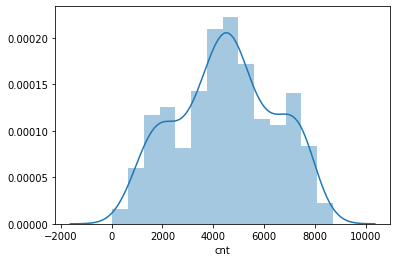

In [400]:
sns.distplot(df['cnt']);

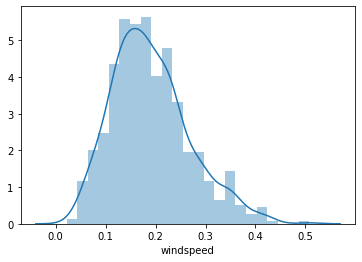

In [401]:
sns.distplot(df['windspeed']); ## windspeed is leftskewed##

# Outlier Analysis#

{'whiskers': [<matplotlib.lines.Line2D at 0x1a29e11f98>,
 'caps': [<matplotlib.lines.Line2D at 0x1a29ea6c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29ea6240>],
 'medians': [<matplotlib.lines.Line2D at 0x1a29ea6f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a29eb0668>],
 'means': []}

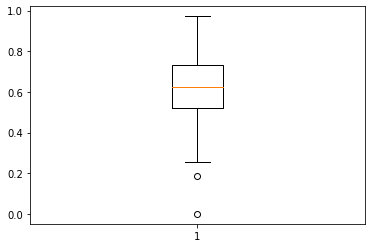

In [402]:
%matplotlib inline
plt.boxplot(df['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a29eca320>,
 'caps': [<matplotlib.lines.Line2D at 0x1a29f00d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29f00320>],
 'medians': [<matplotlib.lines.Line2D at 0x1a29f09400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a29f09748>],
 'means': []}

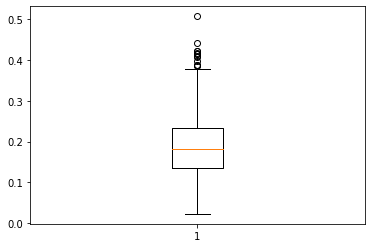

In [403]:
plt.boxplot(df['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a29f889b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2a015a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29facf60>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2a015e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2a01f438>],
 'means': []}

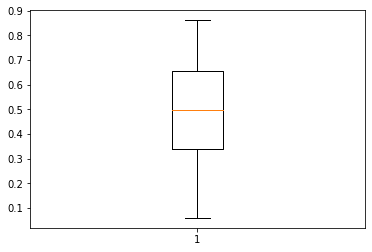

In [404]:
plt.boxplot(df['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2a06eeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2a07c828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2a06ed68>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2a07ceb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2a07cf98>],
 'means': []}

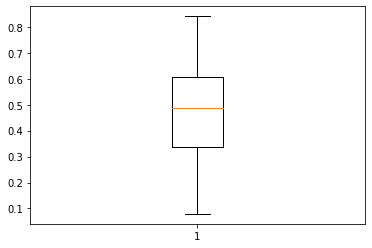

In [405]:
plt.boxplot(df['atemp'])

In [406]:
cnames = ["dteday","yr","season","mnth","workingday","weekday","weathersit","temp","atemp","hum","windspeed"]
pnames = ["temp","atemp","hum","windspeed"]

In [407]:
for i in pnames :
    print (i)
    q75,q25 = np.percentile(df.loc[:,i],[75,25])
    iqr = q75-q25
    
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

print(min)
print(max)

df = df.drop(df[df.loc[:,i] < min].index)
df = df.drop(df[df.loc[:,i] > max].index)

temp
atemp
hum
windspeed
-0.012446750000000034
0.38061125


# Feature Engineering#

In [408]:
df['dteday'] = pd.to_datetime(df['dteday'],yearfirst=True)
df['season'] = df['season'].astype('category')
df['yr'] = df['yr'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

df['temp'] = df['temp'].astype('float')
df['atemp'] = df['atemp'].astype('float')
df['hum'] = df['hum'].astype('float')
df['windspeed'] = df['windspeed'].astype('float')
df['casual'] = df['casual'].astype('float')
df['registered'] = df['registered'].astype('float')
df['cnt'] = df['cnt'].astype('float')

# Feature Selection#

In [409]:
df_corr = df.loc[:,cnames]

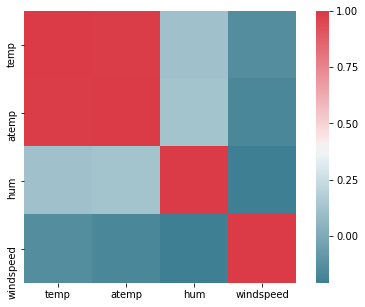

In [410]:
f, ax = plt.subplots(figsize=(7, 5))
corr=df_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [411]:
#Chi Square Test of Independence
#Saving Categorical Numbers
cat_names = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

In [412]:
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['cnt'], df[i]))
    print(dof)

season
2052
yr
684
mnth
7524
holiday
684
weekday
4104
workingday
684
weathersit
1368


In [413]:
#Removing variables atemp beacuse it is highly correlated with temp,
#Removing weekday,holiday because they dont contribute much to the independent variable
#Removing Causal and registered because that's what we need to predict.

df = df.drop(['dteday','atemp','holiday','workingday','casual','registered'], axis =1)

# exploratory data analysis

In [414]:
#Distribution of cnt
%matplotlib inline

/Users/ravindranlakshmanapillai/Desktop/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


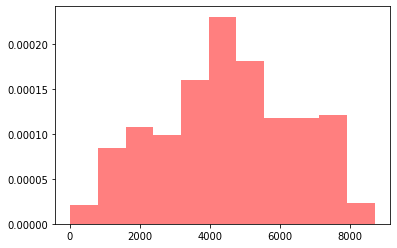

In [415]:
num_bins = 11
plt.hist(df['cnt'], num_bins, normed=1, facecolor='red', alpha=0.5)
plt.show()

mnth
1     61
2     53
3     59
4     58
5     62
6     60
7     62
8     62
9     60
10    60
11    60
12    61
dtype: int64


Text(0, 0.5, 'Total Bikes Rented')

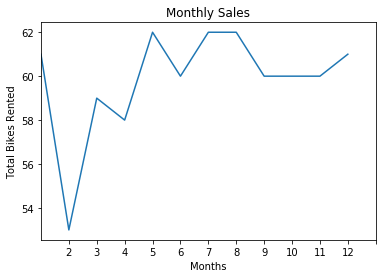

In [416]:
#Bike Rentals Monthly
sales_by_month = df.groupby('mnth').size()
print(sales_by_month)
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Monthly Sales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Bikes Rented')

Text(0, 0.5, 'Total BIkes Rented')

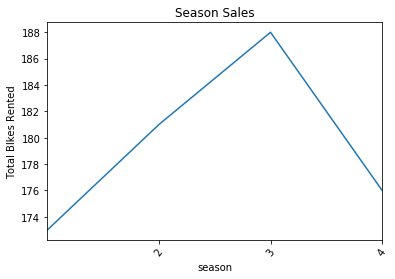

In [417]:
#Sales by Season
sales_by_weekday = df.groupby('season').size()
plot_by_day = sales_by_weekday.plot(title='Season Sales',xticks=(range(1,4)),rot=55)
plot_by_day.set_xlabel('season')
plot_by_day.set_ylabel('Total BIkes Rented')

# model development##

In [418]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [419]:
df.shape

(718, 10)

In [420]:
df.head(5)

,instant,season,yr,mnth,weekday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,1,6,2,0.344167,0.805833,0.160446,985.0
1,2,1,0,1,0,2,0.363478,0.696087,0.248539,801.0
2,3,1,0,1,1,1,0.196364,0.437273,0.248309,1349.0
3,4,1,0,1,2,1,0.200000,0.590435,0.160296,1562.0
4,5,1,0,1,3,1,0.226957,0.436957,0.186900,1600.0


In [421]:
type(df)

pandas.core.frame.DataFrame

In [422]:
#Divide data into train and test
X = df.values[:,7:10]
Y = df.values[:,7:10]

X_train,y_train,X_test,y_test = train_test_split( X, Y, test_size = 0.2)

In [423]:
type(X_train)

numpy.ndarray

In [424]:
X_train.shape

(574, 3)

In [425]:
y_train.shape

(144, 3)

In [426]:
RF_model = RandomForestRegressor(n_estimators = 1000, random_state = 1337)

In [427]:
# Train the model on training data
RF_model.fit(X_train, X_test);

In [428]:
# Use the forest's predict method on the test data
predictions = RF_model.predict(y_train)

In [429]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

In [430]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

In [431]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 82.71 %.


In [432]:
#Random Forest Model has been developed and result calculated.

# Decision Tree ##

In [437]:
#Import Libraries for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [438]:
model_DT=DecisionTreeClassifier(criterion='entropy')

In [441]:
train,test = train_test_split(df, test_size = 0.2, random_state = 123)

In [442]:
dt_model = DecisionTreeRegressor(random_state=123).fit(train.iloc[:,0:9], train.iloc[:,9])

In [443]:
dt_predictions = dt_model.predict(test.iloc[:,0:9])

In [444]:
df_dt = pd.DataFrame({'actual': test.iloc[:,9], 'pred': dt_predictions})
df_dt.head()

,actual,pred
225,3820.0,4649.0
429,3333.0,3624.0
716,4585.0,3510.0
653,5875.0,7733.0
341,3322.0,2431.0


In [447]:
#Function for Mean Absolute Percentage Error
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual))*100
    return mape

In [448]:
MAPE(test.iloc[:,9],dt_predictions) # MAPE: 16.825% #Accuracy: 83.18%

16.825482043979328

# Linear Regression ### r2=1

In [450]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [451]:
model_lr=LinearRegression()

In [452]:
model_lr.fit(X_train,X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [453]:
predictions_lr=model_lr.predict(y_train)
predictions_lr

array([[5.62083e-01, 1.94037e-01, 3.83000e+03],
       [7.39167e-01, 2.74879e-01, 2.03400e+03],
       [5.49167e-01, 1.86562e-01, 8.12000e+03],
       [9.29167e-01, 1.61079e-01, 1.00500e+03],
       [5.06364e-01, 1.08550e-01, 1.74600e+03],
       [5.07917e-01, 2.25129e-01, 7.13200e+03],
       [7.09583e-01, 1.89679e-01, 5.47800e+03],
       [7.29167e-01, 3.26500e-01, 4.40000e+03],
       [8.10000e-01, 1.26883e-01, 5.89200e+03],
       [7.99167e-01, 2.81104e-01, 5.97600e+03],
       [6.25417e-01, 1.84092e-01, 5.26700e+03],
       [2.75833e-01, 2.32596e-01, 5.16900e+03],
       [3.81304e-01, 3.29665e-01, 1.95100e+03],
       [6.52500e-01, 1.38692e-01, 4.90600e+03],
       [8.18750e-01, 2.13938e-01, 4.78800e+03],
       [6.64167e-01, 2.30721e-01, 6.27300e+03],
       [6.11250e-01, 7.71250e-02, 7.05500e+03],
       [6.49565e-01, 2.32970e-01, 1.97700e+03],
       [5.91250e-01, 1.82833e-01, 5.53800e+03],
       [4.46250e-01, 3.14675e-01, 3.36800e+03],
       [5.07500e-01, 2.33221e-01, 3.1900

In [454]:
print(model_lr.intercept_) 

[-3.33066907e-16 -3.24462679e-13 -3.63797881e-12]


In [455]:
print(model_lr.coef_)

[[ 1.00000000e+00  1.29942143e-16  7.31784378e-20]
 [-2.30059972e-13  1.00000000e+00  9.29676858e-17]
 [ 5.26028560e-13 -1.44363701e-12  1.00000000e+00]]


In [456]:
from sklearn import metrics

In [457]:
metrics.r2_score(y_test,predictions_lr)

1.0